Titanic Survival Analysis: Exploring Key Factors Behind Passenger Outcomes.

In [2]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # Data visulization

import matplotlib.pyplot as plt

import os

folder_path = r"D:\NATUS VINCERE\Data Science and Analyst\Titanic"

csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {}

for file in csv_files:
    path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_csv(path)


In [3]:
# Folder lokasi penyimpanan
folder = r"D:\NATUS VINCERE\Data Science and Analyst\Titanic"

train_df = pd.read_csv(os.path.join(folder, "train.csv"))
test_df = pd.read_csv(os.path.join(folder, "test.csv"))
gender_df = pd.read_csv(os.path.join(folder, "gender_submission.csv"))

train_df.head(), test_df.head(), gender_df.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [4]:
train_df["dataset"] = "train"
test_df["dataset"] = "test"


full_data = pd.concat([train_df, test_df], ignore_index=True, sort=False)
full_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [6]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
full_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dataset           0
dtype: int64

In [8]:
if 'Cabin' in full_data.columns:
    full_data.drop(columns=['Cabin'],inplace=True)
full_data["Age"] = full_data.groupby(["Sex", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
)
full_data["Fare"] = full_data.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)
full_data['Embarked'].fillna(full_data['Embarked'].mode()[0],inplace=True)

full_data.isnull().sum()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_12284\217999707.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['Embarked'].fillna(full_data['Embarked'].mode()[0],inplace=True)


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dataset          0
dtype: int64

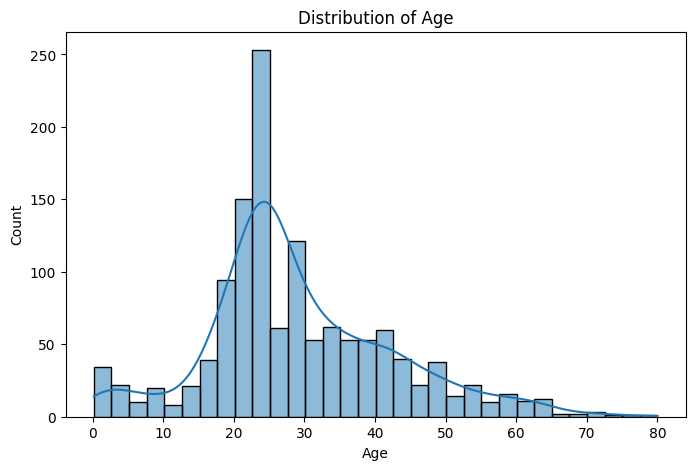

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(full_data["Age"],kde=True)
plt.title("Distribution of Age")
plt.show()

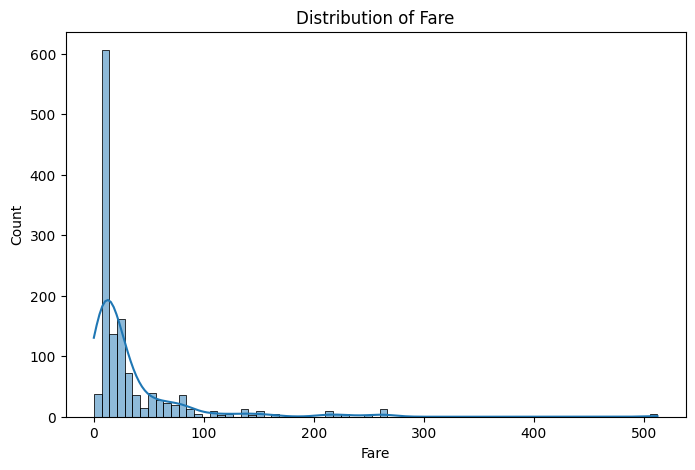

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(full_data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

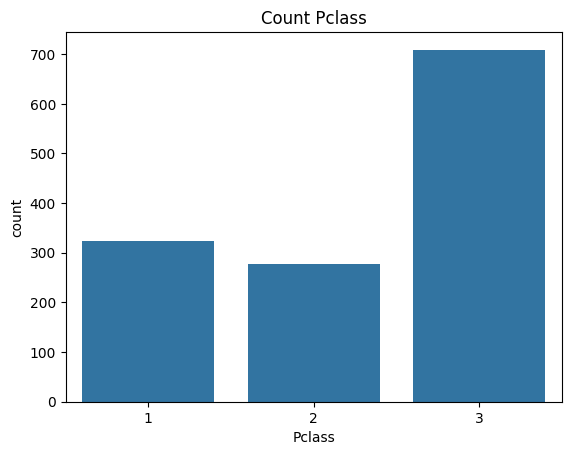

In [11]:
sns.countplot(data=full_data, x='Pclass')
plt.title('Count Pclass')
plt.show()

In [12]:
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

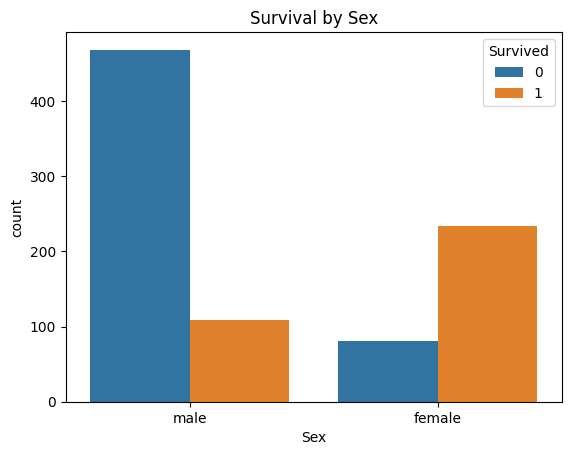

In [13]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

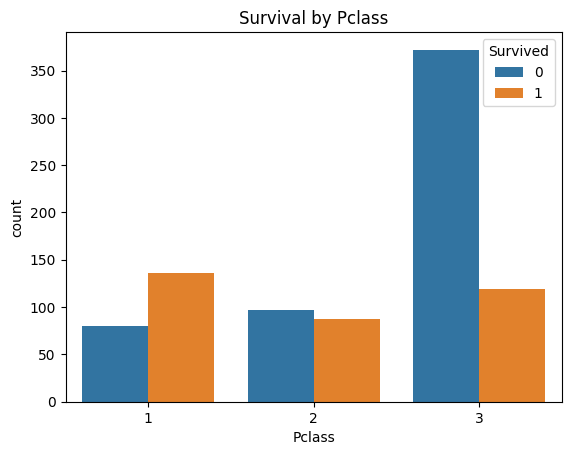

In [14]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')
plt.show()

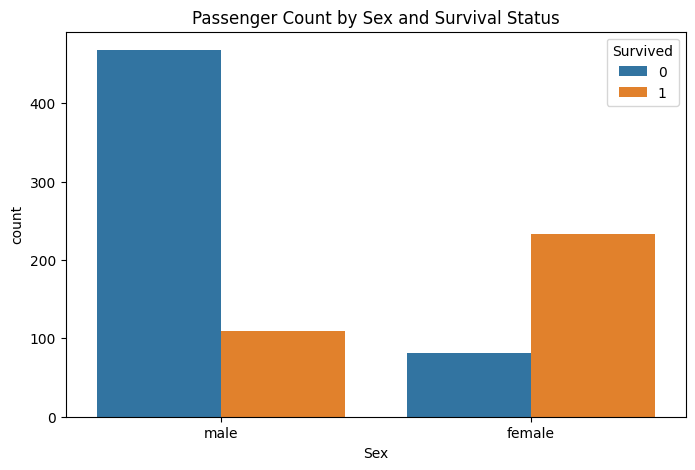

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Passenger Count by Sex and Survival Status")
plt.show()

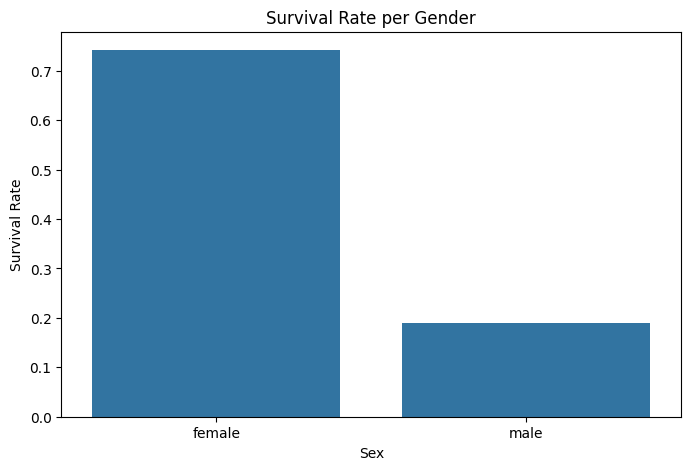

In [16]:
survival_rate = train_df.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=survival_rate, x='Sex', y='Survived')
plt.title("Survival Rate per Gender")
plt.ylabel("Survival Rate")
plt.show()

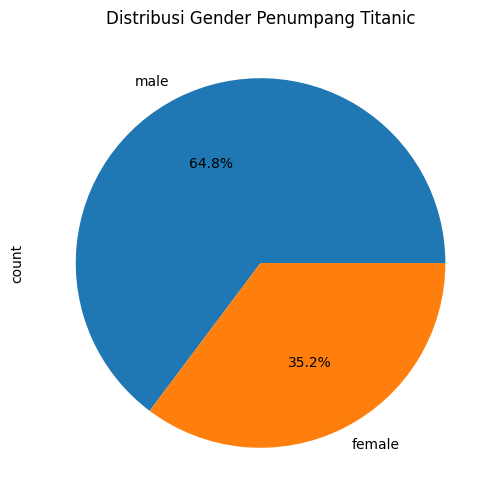

In [17]:
train_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Distribusi Gender Penumpang Titanic")
plt.show()

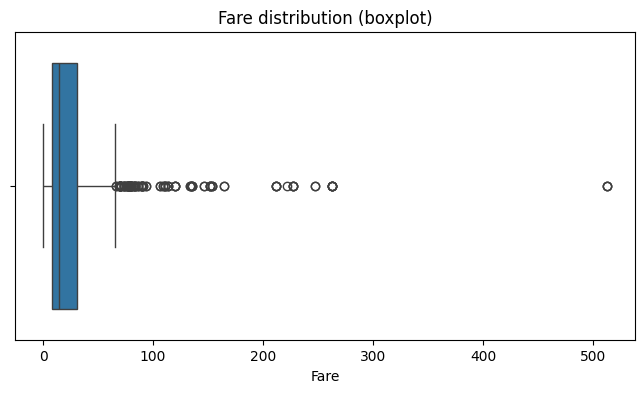

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df['Fare'])
plt.title("Fare distribution (boxplot)")
plt.show()

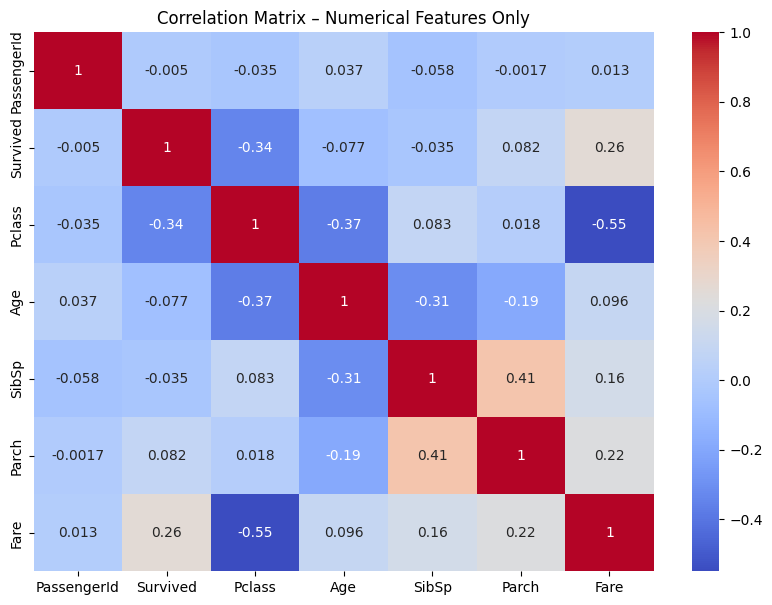

In [23]:
plt.figure(figsize=(10,7))

numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix – Numerical Features Only")
plt.show()

In [24]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0,12,18,60,80],
                              labels=['Child','Teen','Adult','Senior'])

train_df.groupby("AgeGroup")["Survived"].mean()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_12284\3776987457.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.388788
Senior    0.227273
Name: Survived, dtype: float64

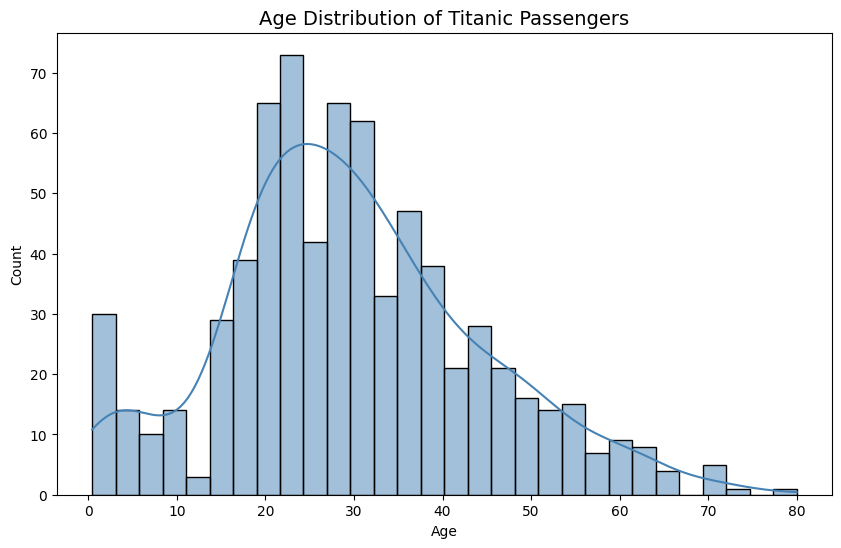

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='steelblue')
plt.title("Age Distribution of Titanic Passengers", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

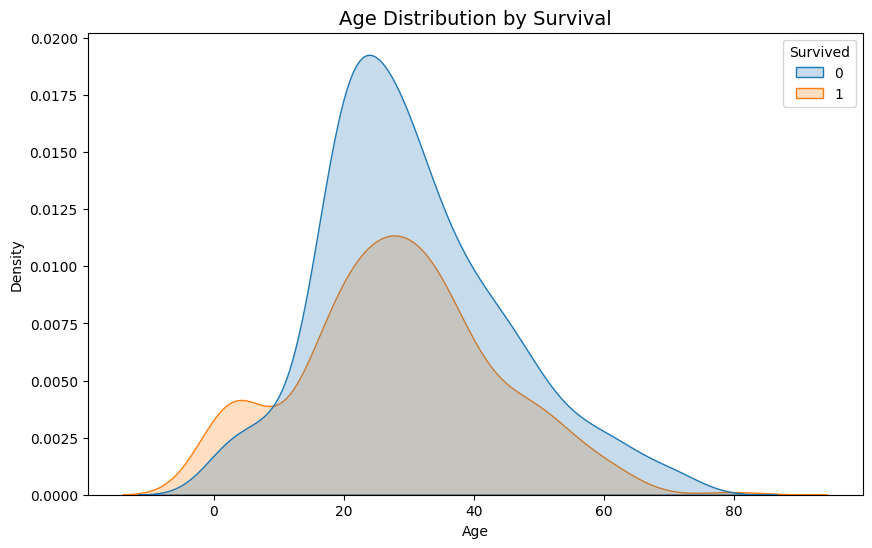

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=train_df, x="Age", hue="Survived", fill=True)
plt.title("Age Distribution by Survival", fontsize=14)
plt.xlabel("Age")
plt.show()

Overall Summary

Based on the analysis of the Titanic dataset, several key factors strongly influenced a passenger’s likelihood of survival.

The most dominant factor was gender. Female passengers had a significantly higher chance of surviving compared to males. Another major factor was ticket class, where first-class passengers had better access to lifeboats and therefore a higher survival rate.

Age also played an important role. Children were more likely to be saved because evacuation procedures tended to prioritize them. Economic factors, such as ticket fare, showed a positive relationship with survival; passengers who paid higher fares generally had better cabins and closer proximity to lifeboats.

Overall, the passengers who had the highest chance of survival were:

Passengers More Likely to Survive :

- Females

- First-class passengers

- Children (under 15 years old)

- Passengers with higher ticket fares

In contrast, the group with the lowest survival rate consisted of:

- Adult males

- Third-class passengers

- Passengers with lower ticket fares

These insights highlight how social and economic factors played a significant role during the Titanic tragedy.